In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

In [2]:
# parameters
c0 = 6                      #concentration parameter
A = 30                      #centroid velocity amplitude (km/s)
p = 1                       #This parameter was fixed at p = 1, which corresponds to an asymptotically flat rotation curve at large radii

# equation (eq2) from "Testing Gravitatational Field in Elliptic Galaxies" paper
def v(r):
    return A*r / ((r**2 + c0**2)**(p/2))

g_v = np.vectorize(v)

# Polar coordinates (still trying to figure out how to convert polar to cartesian)

## parameters
#vsys = 1.78e4                #systemic velocity (km/s)
#theta = nf.i                 #disk inclination
#c0 = nf.n_c                  #concentration parameter
#psi0 = 83.3*(np.pi/180)      #position angle of the line of nodes
#A = 453.7                    #centroid velocity amplitude (km/s)
#p = 1                        #This parameter was fixed at p = 1, which corresponds to an asymptotically flat rotation curve at large radii

## equation from "Gas rotation, shocks and outflow within the inner 3 kpc of the radio galaxy 3C 33"
#def v_gas(R,psi,psi0,A,theta,c0,p):
#    vsys + A*R*np.cos(psi-psi0)*np.sin(theta)*(np.cos(theta)**p) / ((R**2((np.sin(psi-psi0)**2)+(np.cos(theta)**2)*(np.cos(psi-psi0)**2))+(c0**2)*(np.cos(theta)**2))**(p/2))
#    r = R * np.cos(psi)
#    y = R * np.sin(psi)
#    theta = nf.i
#    return v_gas(r,y,psi0,A,theta,c0,p)
#g_v = np.vectorize(v_gas)


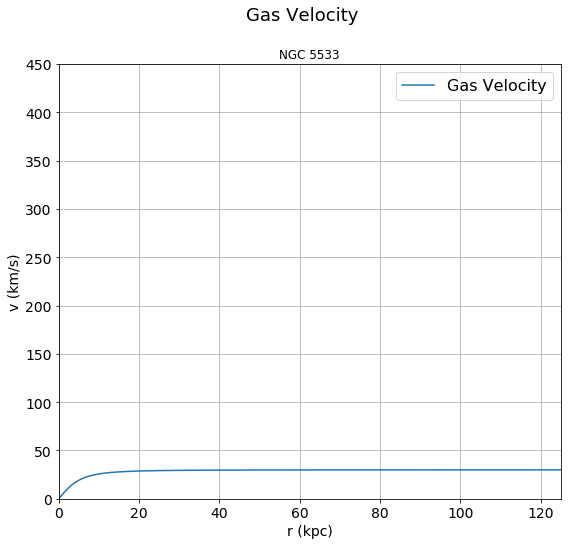

In [3]:
#plot gas velocity
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

r = np.linspace(0.1,125,100)

plt.plot(r, g_v(r), linestyle='solid', label='Gas Velocity')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Gas Velocity', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,125)
ax.set_ylim(0,450)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.savefig('GasVelocity.png')
plt.show()